In [1]:
execution_mode = 'full'

# Features Discussion and Dummy Classifier Baseline

The features for training and performance testing of the models have been calculated in the previous chapters. This chapter discusses the calculated values of the feature matrix in its first part. After having gained a clear idea on the behaviour of the features and the 

## Table of Contents

- [Data Takeover](#Data-Takeover)
- [Features Discussion](#Features-Discussion)
- [Correlation Matrix](#Correlation-Matrix)
- [Principal Component Analysis - PCA](#Principal-Component-Analysis---PCA)
- [t-SNE](#t-SNE)
- [k-means](#k-means)
- [Train/Test Split](#Train/Test-Split)
- [Dummy Classifier](#Dummy-Classifier)
    - [Classifier Fit and Prediction](#Classifier-Fit-and-Prediction)
    - [Performance Measurement](#Performance-Measurement)
- [Results Handover](#Results-Handover)

## Data Takeover

Read in DataFrame from chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) as input for processing in this chapter.

In [2]:
import os
import pandas as pd
import pickle as pk

path_goldstandard = './daten_goldstandard'

# Restore metadata so far
with open(os.path.join(path_goldstandard, 'columns_metadata.pkl'), 'rb') as handle:
    columns_metadata_dict = pk.load(handle)

# Restore results so far

df_attribute_with_sim_feature = pd.read_pickle(os.path.join(
    path_goldstandard, 'labelled_feature_matrix_full.pkl'), compression=None
                                              )


df_attribute_with_sim_feature.head()

,duplicates,coordinate_E_delta,coordinate_E_x,coordinate_E_y,coordinate_N_delta,coordinate_N_x,coordinate_N_y,corporate_full_delta,corporate_full_x,corporate_full_y,...,scale_y,ttlfull_245_delta,ttlfull_245_x,ttlfull_245_y,ttlfull_246_delta,ttlfull_246_x,ttlfull_246_y,volumes_delta,volumes_x,volumes_y
0,1,-0.1,,,-0.1,,,-0.1,,,...,,1.000000,"emma, roman","emma, roman",-0.1,,,1.0,600,600
1,1,-0.1,,,-0.1,,,-0.1,,,...,,0.787879,"emma, roman",emma,-0.1,,,1.0,600,600
2,1,-0.1,,,-0.1,,,-0.1,,,...,,1.000000,"emma, roman","emma, roman",-0.1,,,1.0,600,600
3,1,-0.1,,,-0.1,,,-0.1,,,...,,0.787879,emma,"emma, roman",-0.1,,,1.0,600,600
4,1,-0.1,,,-0.1,,,-0.1,,,...,,1.000000,emma,emma,-0.1,,,1.0,600,600


The columns with the original attribute values are not needed for further processing and they will be dropped to generate the feature matrix for modelling the estimators.

In [3]:
# Reduce feature DataFrame to all delta and 'duplicates' columns
df_labelled_feature_matrix = df_attribute_with_sim_feature[columns_metadata_dict['features']]

for i in range(2):
    display(df_labelled_feature_matrix[df_labelled_feature_matrix.duplicates==i].sample(n=20))

,coordinate_E_delta,coordinate_N_delta,corporate_full_delta,doi_delta,edition_delta,exactDate_delta,format_prefix_delta,format_postfix_delta,isbn_delta,ismn_delta,...,part_delta,person_100_delta,person_700_delta,person_245c_delta,pubinit_delta,scale_delta,ttlfull_245_delta,ttlfull_246_delta,volumes_delta,duplicates
124928,-0.10,-0.10,-0.05,-0.10,-0.10,0.500,0.0,0.428571,1.0,-0.10,...,-0.050000,-0.050000,0.525722,0.627057,-0.050000,-0.10,0.620431,-0.10,-0.050000,0
64365,-0.10,-0.10,-0.05,-0.10,-0.10,0.500,1.0,1.000000,1.0,-0.05,...,-0.100000,1.000000,-0.100000,-0.050000,-0.100000,-0.10,0.735495,-0.05,1.000000,0
106289,-0.10,-0.10,-0.10,-0.10,-0.10,0.625,0.0,0.111111,0.0,-0.10,...,-0.050000,-0.050000,-0.050000,0.479910,0.422619,-0.10,0.532520,-0.10,0.000000,0
76455,-0.10,-0.10,-0.10,-0.10,-0.10,0.500,0.0,0.428571,1.0,-0.10,...,-0.100000,-0.050000,-0.050000,0.641261,-0.050000,-0.10,0.598556,-0.10,0.800000,0
79527,-0.10,-0.10,-0.10,-0.05,-0.10,0.250,0.0,0.428571,1.0,-0.10,...,-0.050000,-0.050000,-0.050000,0.394444,-0.100000,-0.10,0.514260,-0.10,-0.050000,0
245878,-0.05,-0.05,-0.05,-0.10,-0.10,0.500,0.0,0.428571,0.0,-0.10,...,-0.050000,-0.050000,-0.050000,0.468668,-0.050000,-0.05,0.487607,-0.05,0.733333,0
155854,-0.10,-0.10,-0.10,-0.10,-0.10,0.500,0.0,0.111111,0.0,-0.10,...,-0.100000,-0.050000,0.498155,0.594725,0.547295,-0.10,0.504316,-0.10,0.833333,0
124903,-0.10,-0.10,-0.05,-0.10,-0.10,0.500,0.0,0.428571,1.0,-0.10,...,-0.050000,-0.050000,0.545166,0.602831,0.548535,-0.10,0.614052,-0.10,-0.050000,0
227965,-0.10,-0.10,-0.10,-0.10,-0.10,0.500,0.0,0.111111,0.0,-0.10,...,0.676190,-0.050000,-0.050000,-0.050000,0.537165,-0.05,0.557328,-0.10,0.733333,0
20969,-0.10,-0.10,-0.05,-0.10,-0.10,0.250,0.0,0.000000,1.0,-0.10,...,-0.100000,-0.050000,0.569625,0.422222,-0.050000,-0.10,0.568350,-0.10,0.000000,0


,coordinate_E_delta,coordinate_N_delta,corporate_full_delta,doi_delta,edition_delta,exactDate_delta,format_prefix_delta,format_postfix_delta,isbn_delta,ismn_delta,...,part_delta,person_100_delta,person_700_delta,person_245c_delta,pubinit_delta,scale_delta,ttlfull_245_delta,ttlfull_246_delta,volumes_delta,duplicates
363,-0.1,-0.1,-0.10,-0.1,-0.1,0.75,1.0,1.0,0.0,-0.1,...,-0.10000,-0.05,-0.050000,0.788123,-0.050000,-0.1,0.837209,-0.1,1.000000,1
975,-0.1,-0.1,-0.10,-0.1,-0.1,1.00,1.0,1.0,1.0,-0.1,...,-0.10000,1.00,1.000000,1.000000,1.000000,-0.1,1.000000,-0.1,1.000000,1
703,-0.1,-0.1,-0.10,-0.1,-0.1,0.75,1.0,1.0,1.0,-0.1,...,0.67265,-0.05,-0.050000,0.752688,0.833333,-0.1,1.000000,-0.1,1.000000,1
1300,-0.1,-0.1,-0.10,-0.1,1.0,0.75,1.0,1.0,1.0,-0.1,...,-0.10000,-0.10,1.000000,1.000000,1.000000,-0.1,1.000000,-0.1,1.000000,1
153,-0.1,-0.1,-0.05,-0.1,-0.1,0.75,1.0,1.0,1.0,-0.1,...,-0.10000,1.00,0.897436,0.720721,1.000000,-0.1,0.884058,-0.1,0.692308,1
779,-0.1,-0.1,-0.10,-0.1,-0.1,0.75,1.0,1.0,1.0,-0.1,...,-0.10000,1.00,-0.100000,1.000000,-0.100000,-0.1,1.000000,-0.1,1.000000,1
106,-0.1,-0.1,-0.10,-0.1,-0.1,0.50,1.0,1.0,1.0,-0.1,...,-0.10000,1.00,-0.100000,-0.100000,1.000000,-0.1,1.000000,-0.1,1.000000,1
439,-0.1,-0.1,1.00,-0.1,-0.1,0.75,1.0,1.0,1.0,-0.1,...,-0.10000,1.00,1.000000,1.000000,1.000000,-0.1,1.000000,-0.1,1.000000,1
1069,-0.1,-0.1,-0.10,-0.1,-0.1,0.75,1.0,1.0,1.0,-0.1,...,-0.10000,-0.10,-0.100000,-0.050000,0.977778,-0.1,0.863798,-0.1,1.000000,1
415,-0.1,-0.1,-0.10,-0.1,-0.1,0.75,1.0,1.0,1.0,-0.1,...,-0.10000,1.00,1.000000,1.000000,1.000000,-0.1,1.000000,-0.1,1.000000,1


In [4]:
print('Part of duplicates (1) on uniques (2) in units of [%]')
print(df_labelled_feature_matrix.duplicates.value_counts(normalize=True)*100)

Part of duplicates (1) on uniques (2) in units of [%]
0    99.432212
1     0.567788
Name: duplicates, dtype: float64


## Features Discussion

By now, the features have become purely numerical values. In this section, the features of the feature matrix will be analysed and discussed deeper.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

left_xlim_all = -1.1
left_xlim_0 = -0.1
right_xlim = 1.1
no_bins = 33

def plot_feature_histogram (df, attrib) :
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

    fig.suptitle(f'{attrib} counts per similarity value')
    ax0.hist([df[attrib+'_delta'][df.duplicates==1],
              df[attrib+'_delta'][df.duplicates==0]],
             bins=np.linspace(left_xlim_all, right_xlim, no_bins),
             density=True, align='mid', color=['green', 'red'],
             label=['duplicates', 'uniques'])
#    ax0.set_title(f'{attrib} counts per similarity value')
    ax0.set_xlabel('similarity value')
    ax0.set_xlim([left_xlim_all, right_xlim])
    ax0.set_ylabel('number of counts in bin\n(normed to 1st bar height)')
    ax0.legend()

    ax1.hist([df[attrib+'_delta'][(df[attrib+'_delta']>=0.0) & (df.duplicates==1)],
              df[attrib+'_delta'][(df[attrib+'_delta']>=0.0) & (df.duplicates==0)]],
             bins=np.linspace(left_xlim_0, right_xlim, no_bins),
             density=True, align='mid', color=['green', 'red'],
             label=['duplicates', 'uniques'])
#    ax1.set_title(f'{attrib} counts per similarity value')
    ax1.set_xlabel('similarity value')
    ax1.set_xlim([left_xlim_0, right_xlim])
#    ax1.set_ylabel('number of counts in bin\n(normed to 1st bar height)')
    ax1.legend()

    plt.show()

    return None

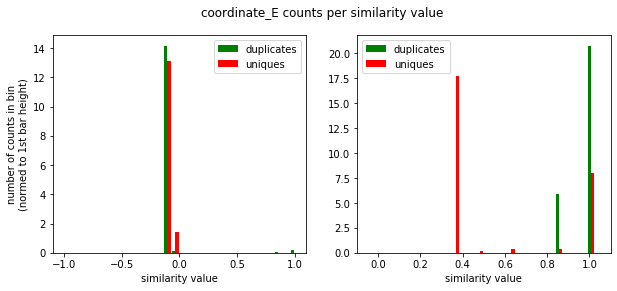

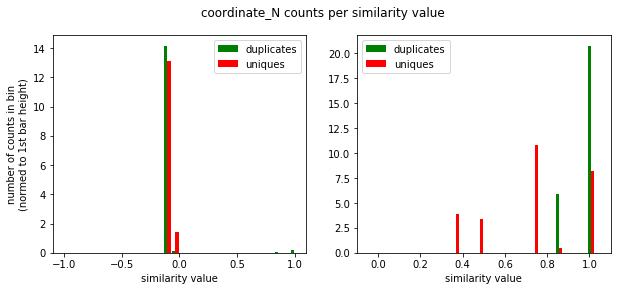

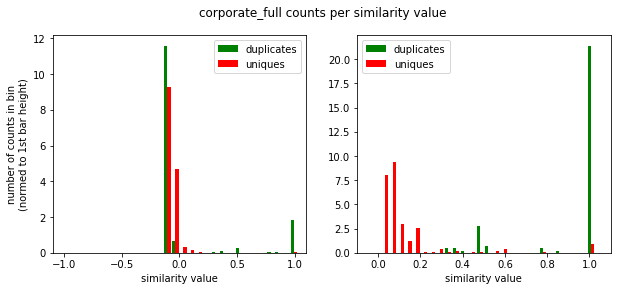

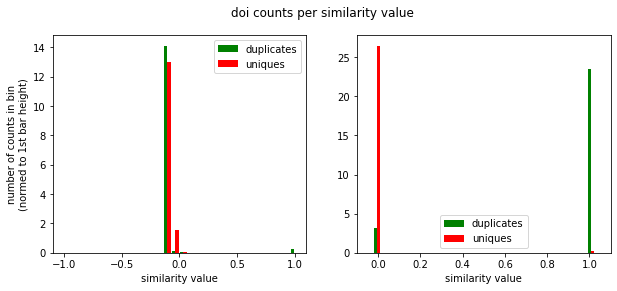

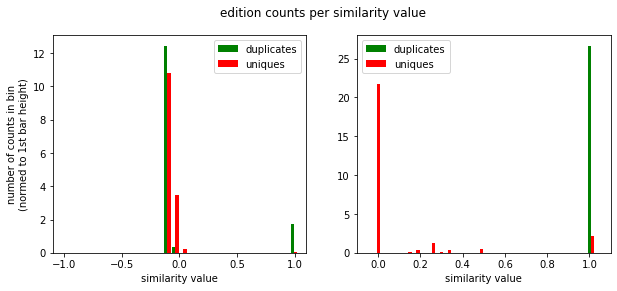

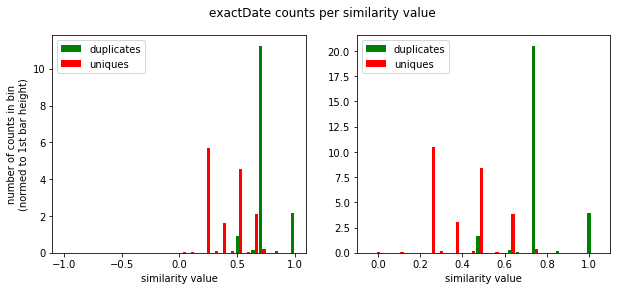

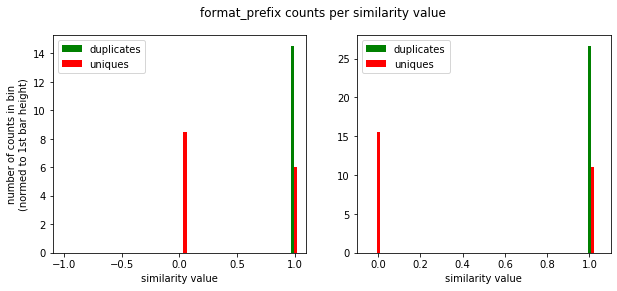

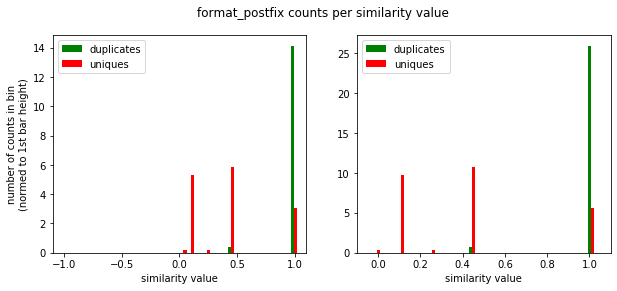

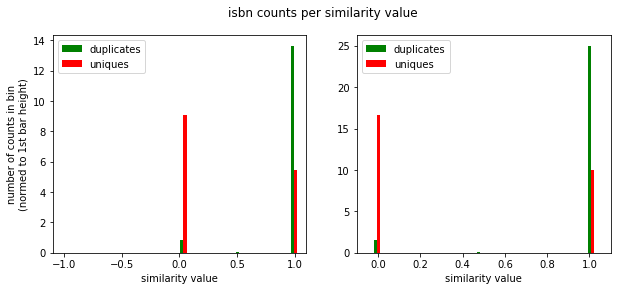

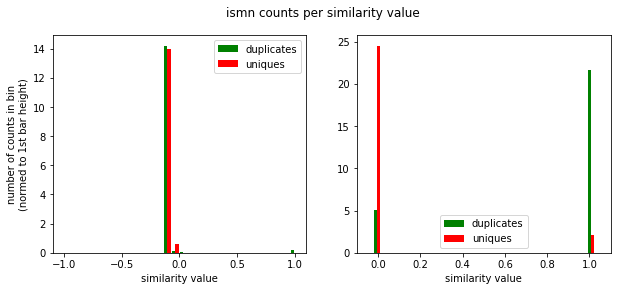

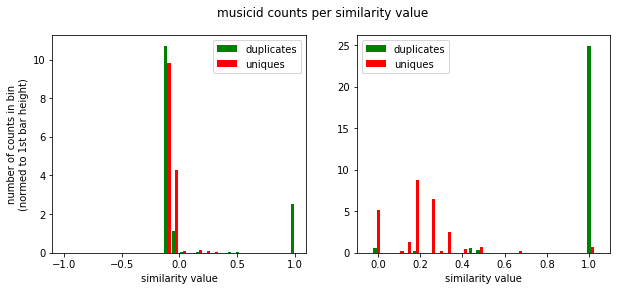

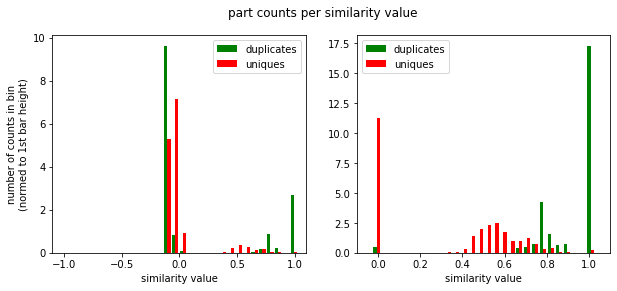

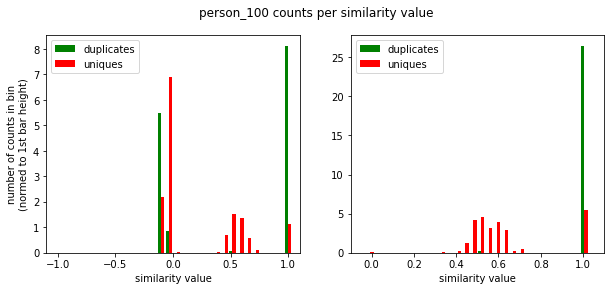

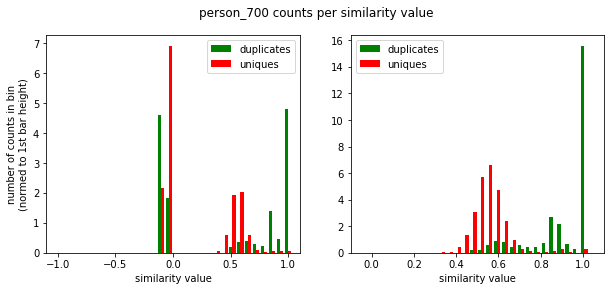

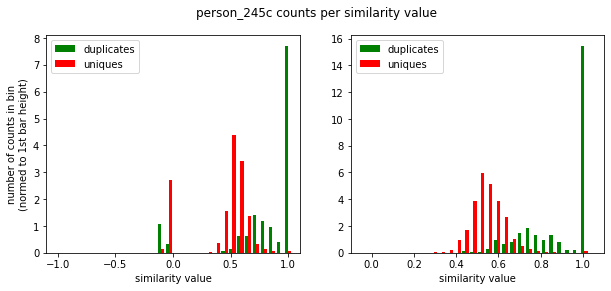

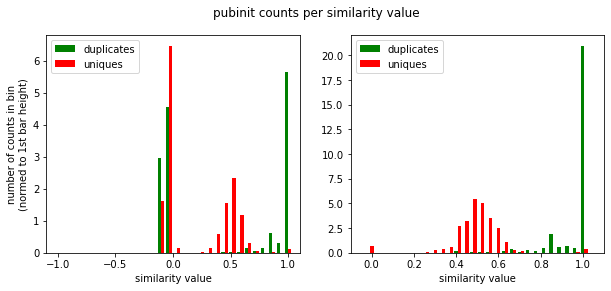

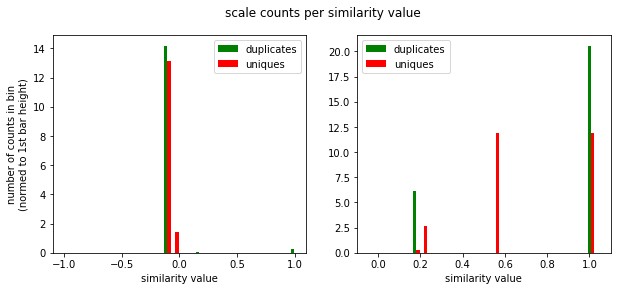

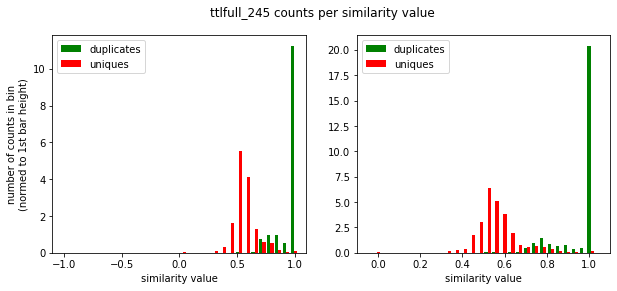

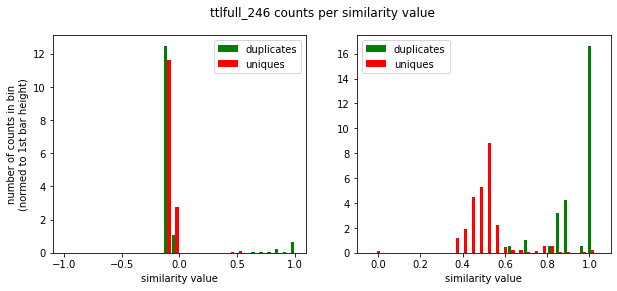

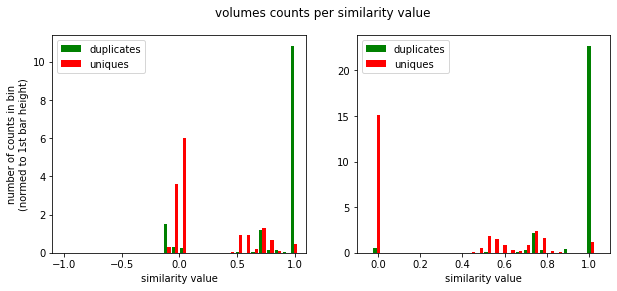

In [6]:
for i in df_labelled_feature_matrix.columns :
    if i not in ['duplicates'] :
        plot_feature_histogram(df_labelled_feature_matrix, i[:-6])

The similarity values of rows with missing values on both sides of a pair have been set to -1.0 with the goal to mark them specifically, see chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb). Ommitting negative values for the similarity delta shows the effect of the similarity value better.

## Correlation Matrix

In [7]:
df_labelled_feature_matrix.corr()

,coordinate_E_delta,coordinate_N_delta,corporate_full_delta,doi_delta,edition_delta,exactDate_delta,format_prefix_delta,format_postfix_delta,isbn_delta,ismn_delta,...,part_delta,person_100_delta,person_700_delta,person_245c_delta,pubinit_delta,scale_delta,ttlfull_245_delta,ttlfull_246_delta,volumes_delta,duplicates
coordinate_E_delta,1.000000,0.972836,0.372802,-0.032930,0.048255,-0.007682,-0.076311,-0.005795,0.097496,-0.013782,...,0.182819,-0.128705,0.047913,-0.054116,0.042453,0.945719,0.006049,0.200708,0.108595,0.030642
coordinate_N_delta,0.972836,1.000000,0.395783,-0.030829,0.046337,-0.004057,-0.059023,0.005773,0.094005,-0.013104,...,0.181727,-0.118760,0.036944,-0.060867,0.041032,0.940286,0.020888,0.178783,0.109998,0.026365
corporate_full_delta,0.372802,0.395783,1.000000,-0.049807,0.012607,0.033538,-0.063402,-0.018272,0.128959,-0.029925,...,-0.020621,-0.179804,0.005957,-0.115311,0.076637,0.384681,0.072273,0.394846,0.035145,0.147799
doi_delta,-0.032930,-0.030829,-0.049807,1.000000,-0.009776,0.000822,0.101367,-0.100638,0.086321,-0.019670,...,0.106270,0.005706,-0.081839,0.007215,-0.224345,-0.030720,-0.084115,-0.044832,-0.131586,0.062009
edition_delta,0.048255,0.046337,0.012607,-0.009776,1.000000,0.026627,0.063551,0.094788,-0.076264,0.018025,...,0.014150,-0.020273,0.072781,0.068045,0.045439,0.044542,0.030850,0.021546,0.027455,0.147660
exactDate_delta,-0.007682,-0.004057,0.033538,0.000822,0.026627,1.000000,0.043842,0.033917,0.073577,0.023478,...,0.006196,0.064886,0.013295,0.034816,0.015254,-0.005936,0.122716,0.003254,0.030312,0.181336
format_prefix_delta,-0.076311,-0.059023,-0.063402,0.101367,0.063551,0.043842,1.000000,0.608106,-0.135551,-0.054114,...,0.101287,0.179989,-0.037946,0.076693,0.000295,-0.059783,0.123575,-0.073129,-0.044750,0.088827
format_postfix_delta,-0.005795,0.005773,-0.018272,-0.100638,0.094788,0.033917,0.608106,1.000000,-0.054993,-0.023581,...,0.019444,0.106831,0.041945,0.140231,0.116908,0.004759,0.172636,-0.044310,0.051906,0.126200
isbn_delta,0.097496,0.094005,0.128959,0.086321,-0.076264,0.073577,-0.135551,-0.054993,1.000000,0.062339,...,-0.060162,-0.032669,-0.027986,-0.134869,-0.032442,0.093559,0.156571,0.090521,0.064873,0.087522
ismn_delta,-0.013782,-0.013104,-0.029925,-0.019670,0.018025,0.023478,-0.054114,-0.023581,0.062339,1.000000,...,-0.003067,0.104339,0.069326,0.061185,0.006718,-0.013040,0.064918,-0.024359,0.081347,0.058410


(21.0, 0.0)

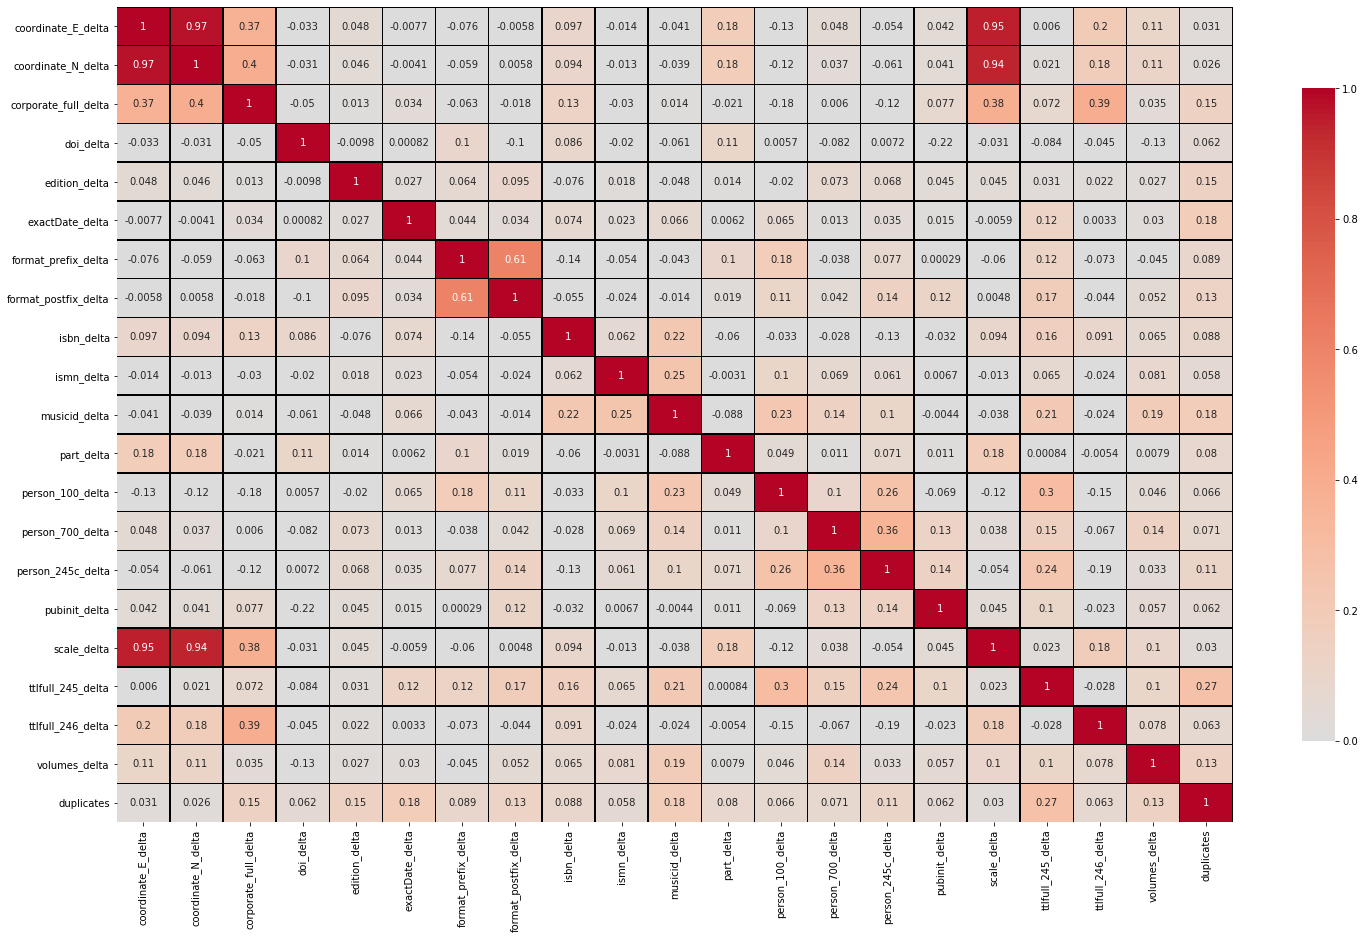

In [8]:
import seaborn as sns

f = plt.subplots(figsize=(25, 15))
ax = sns.heatmap(df_labelled_feature_matrix.corr(), annot=True, square=False, fmt='.2g',
            vmin=.0, vmax=1.0, center=0, cmap= 'coolwarm', linewidths=.5, linecolor='black',
            cbar_kws={"shrink": .8})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

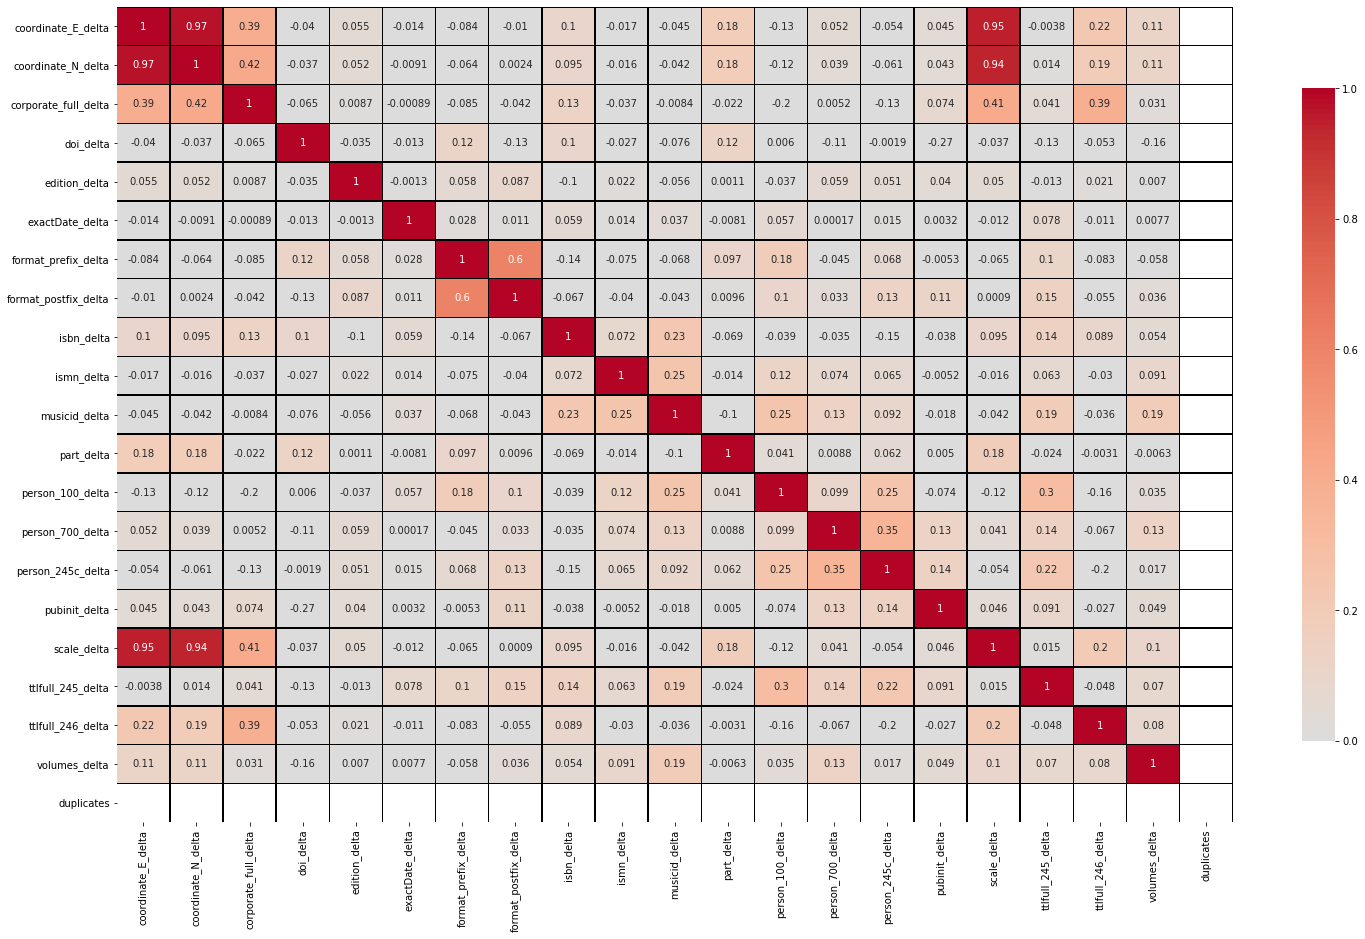

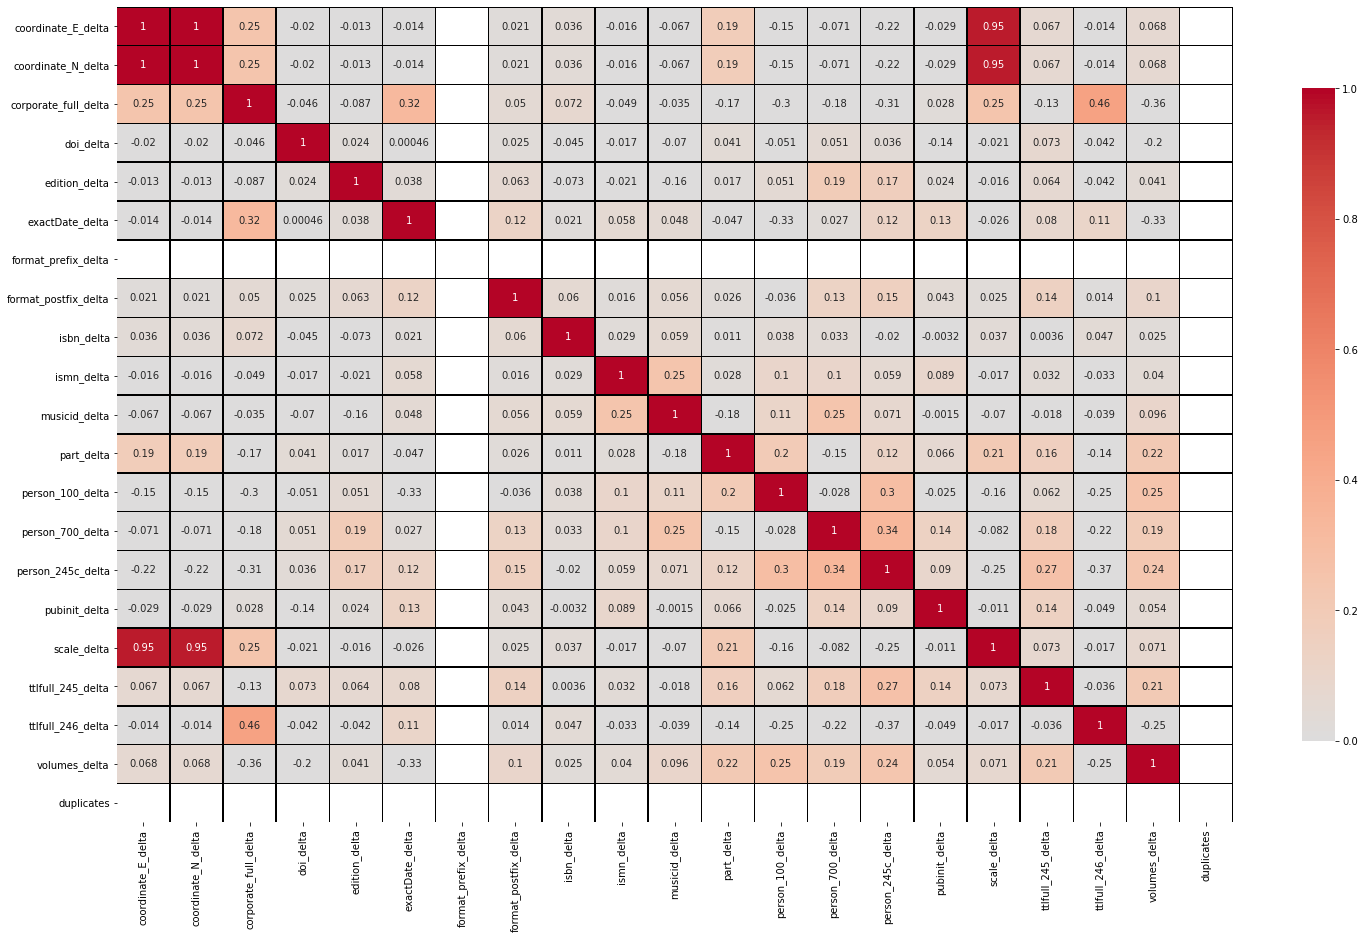

In [9]:
for i in range(2):
    f = plt.subplots(figsize=(25, 15))
    ax = sns.heatmap(
        df_labelled_feature_matrix[df_labelled_feature_matrix.duplicates==i].corr(),
        annot=True, square=False, fmt='.2g', vmin=.0, vmax=1.0, center=0,
        cmap= 'coolwarm', linewidths=.5, linecolor='black', cbar_kws={"shrink": .8})
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

**Question** How does Heatmap look like without negative values?

## Principal Component Analysis - PCA

In [10]:
X = df_labelled_feature_matrix.drop(columns=['duplicates']).values
y = df_labelled_feature_matrix.duplicates.values

A Principal Component Analysis (PCA) calculates the principal components of the feature matrix.

In [11]:
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=None)

# Apply PCA
pca.fit(X, y=None) # Unsupervised learning, no target variable

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The contribution to defining the model can be calculated for each principal component with the help of the variance explained.

In [12]:
# Proportion of variables explained
pve = pca.explained_variance_ratio_
pve

array([2.72049823e-01, 1.90593774e-01, 1.27544748e-01, 1.03562350e-01,
       8.57131788e-02, 6.38416474e-02, 4.54189916e-02, 3.67219480e-02,
       2.92287744e-02, 1.91742454e-02, 8.32974308e-03, 5.70084770e-03,
       3.68915237e-03, 3.00246943e-03, 2.89300285e-03, 1.94833908e-03,
       3.03143505e-04, 1.68924250e-04, 8.58914588e-05, 2.90055895e-05])

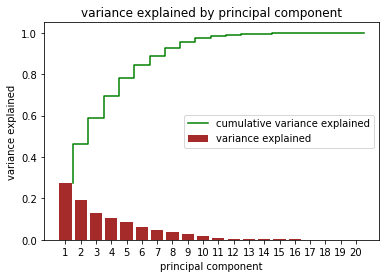

In [13]:
# Create bar plot
xcor = np.arange(1, len(pve) + 1) # 1, 2, ..., n_components
plt.bar(xcor, pve, color='brown', label='variance explained')
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor+0.5, # 1.5, 2.5, ..., n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative variance explained',
    color='green'
)

# Add labels
plt.title('variance explained by principal component')
plt.xlabel('principal component')
plt.ylabel('variance explained')
plt.legend()
plt.show()

The plot above shows the variance explained for each principale component with the brown coloured bars. The variances explained are ordered by their size values. The green step curve represents the cumulated sum of the contribution of the principal components.

In [14]:
variance_to_be_retained = [0.8, 0.9, 0.95, 0.99]

for i in variance_to_be_retained:
    print('* To retain {:.0f}% of the variance explained, we have to keep {:d} ...'.
          format(i*100, len(pve_cumsum[pve_cumsum <= i])))

print('... out of a total of {:d} components.'.format(len(pve)))

* To retain 80% of the variance explained, we have to keep 5 ...
* To retain 90% of the variance explained, we have to keep 7 ...
* To retain 95% of the variance explained, we have to keep 8 ...
* To retain 99% of the variance explained, we have to keep 12 ...
... out of a total of 20 components.


The first two components add-up to the variance explained shown below. With a total number of components of 19, the computation time of the models will remain in acceptable time ranges. There will be no use to reduce the number of components for calculating the models and all components will be kept in the feature matrix.

In [15]:
print(f'Variance explained of two first components {100*(pve[0] + pve[1]):.1f}%.')

Variance explained of two first components 46.3%.


Looking at these two first components only, results in the plot below.

In [16]:
# Create PCA transformer
pca_2 = PCA(n_components=2)

# Apply PCA
pca_2.fit(X, y=None) # Unsupervised learning, no target variable

# Project data onto the first two components
X_2d = pca_2.transform(X)

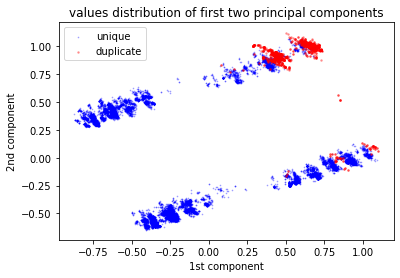

In [17]:
duplicate_category = ['unique', 'duplicate'] # Watch : Order is important
colors = ['blue', 'red']

# Plot points for duplicates and uniques
for dupes in range(len(duplicate_category)):
    # Filter for duplicates or uniques
    idx = (y == dupes)
    
    # Plot their components
    plt.scatter(
        X_2d[idx, 0][:20000], X_2d[idx, 1][:20000],
        label=f'{duplicate_category[dupes]}', marker='.', s=2 if dupes==0 else 10,
        color=colors[dupes], alpha=0.3
    )

# Labels and legend
plt.legend()
plt.title('values distribution of first two principal components')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

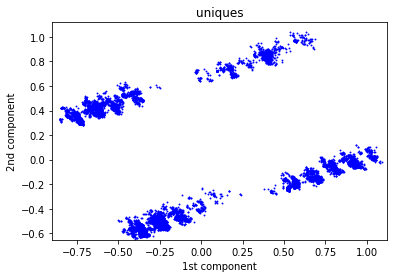

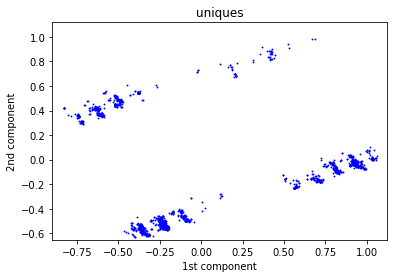

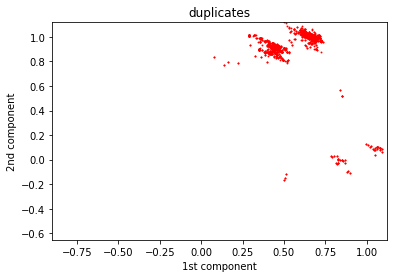

In [18]:
# All plot sizes must be equal
x_min, x_max = np.min(X_2d[:, 0]), np.max(X_2d[:, 0])
y_min, y_max = np.min(X_2d[:, 1]), np.max(X_2d[:, 1])
number_of_duplicates = len(X_2d[y == 1])

# Each category in its own plot
for dupes in range(len(duplicate_category)):
    for multiplyer in [10, 1]:
        if not ((multiplyer > 1) and (dupes == 1)):
            idx = (y == dupes)
            
            # Plot with all components
            plt.scatter(X_2d[idx, 0][:number_of_duplicates*multiplyer],
                        X_2d[idx, 1][:number_of_duplicates*multiplyer],
                        marker='.', s=3,
                        color=colors[dupes])
            plt.xlabel('1st component')
            plt.ylabel('2nd component')
            plt.xlim(x_min, x_max)
            plt.ylim(y_min, y_max)
            plt.title('{}s'.format(duplicate_category[dupes]))
            plt.show()

The result of the plots above is hard to interpret. For the data set of duplicates, a slightly sharper distribution along lines of the first and even the second component may be detected. For the data set of uniques, the distribution may seem like bein more clustered.

## t-SNE

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, verbose=1)

X_dupes = df_labelled_feature_matrix[df_labelled_feature_matrix.duplicates==1
                                    ].drop(columns=['duplicates']).values
X_non_dupes = df_labelled_feature_matrix[df_labelled_feature_matrix.duplicates==0
                                    ].drop(columns=['duplicates']).sample(n=10000).values

X_tsne = {}
X_tsne['duplicate'] = tsne.fit_transform(X_dupes)
X_tsne['unique'] = tsne.fit_transform(X_non_dupes)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1473 samples in 0.003s...
[t-SNE] Computed neighbors for 1473 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1473
[t-SNE] Computed conditional probabilities for sample 1473 / 1473
[t-SNE] Mean sigma: 0.000000


[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.690163


[t-SNE] KL divergence after 1000 iterations: 0.269963
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.094s...


[t-SNE] Computed neighbors for 10000 samples in 2.639s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000


[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.132416


[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.180534


[t-SNE] KL divergence after 1000 iterations: 0.482415


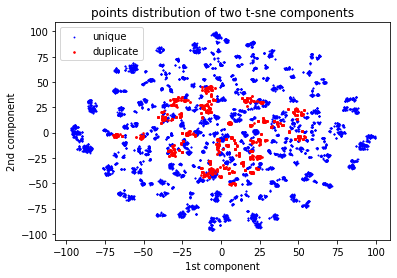

In [20]:
duplicate_category = ['unique', 'duplicate'] # Watch : Order is important
colors = ['blue', 'red']

# Plot points for duplicates and uniques
for dupes in range(len(duplicate_category)):
    # Plot their components
    plt.scatter(X_tsne[duplicate_category[dupes]][:, 0],
                X_tsne[duplicate_category[dupes]][:, 1],
                color=colors[dupes],
                marker='.', s=3 if dupes==0 else 10,
                label=f'{duplicate_category[dupes]}')
plt.legend()
plt.title('points distribution of two t-sne components')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

## k-means

In [21]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
# Compute clsutering and transform X to cluster-distance space.
X_km = km.fit_transform(X, y=None)

X.shape, X_km.shape

((259428, 20), (259428, 2))

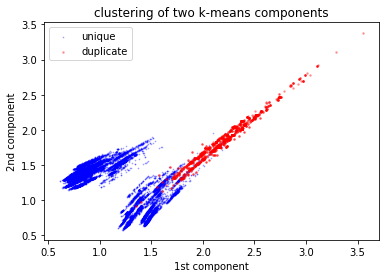

In [22]:
duplicate_category = ['unique', 'duplicate'] # Watch : Order is important
colors = ['blue', 'red']

# Plot points for duplicates and uniques
for dupes in range(len(duplicate_category)):
    # Filter for duplicates or uniques
    idx = (y == dupes)
    
    # Plot their components
    plt.scatter(
        X_km[idx, 0][:20000], X_km[idx, 1][:20000],
        label=f'{duplicate_category[dupes]}', marker='.', s=2 if dupes==0 else 10,
        color=colors[dupes], alpha=0.3
    )

# Labels and legend
plt.legend()
plt.title('clustering of two k-means components')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

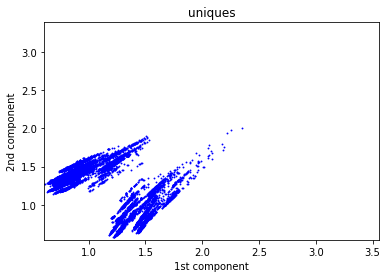

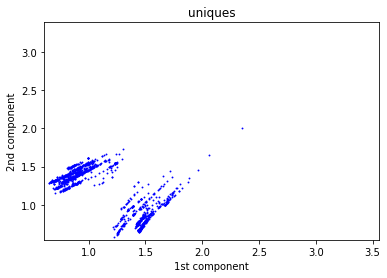

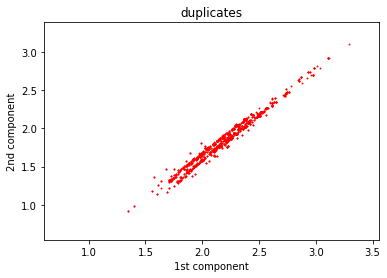

In [23]:
# All plot sizes must be equal
x_min, x_max = np.min(X_km[:, 0]), np.max(X_km[:, 0])
y_min, y_max = np.min(X_km[:, 1]), np.max(X_km[:, 1])
number_of_duplicates = len(X_km[y == 1])

# Each category in its own plot
for dupes in range(len(duplicate_category)):
    for multiplyer in [10, 1]:
        if not ((multiplyer > 1) and (dupes == 1)):
            idx = (y == dupes)
            
            # Plot with all components
            plt.scatter(X_km[idx, 0][:number_of_duplicates*multiplyer],
                        X_km[idx, 1][:number_of_duplicates*multiplyer],
                        marker='.', s=3,
                        color=colors[dupes])
            plt.xlabel('1st component')
            plt.ylabel('2nd component')
            plt.xlim(x_min, x_max)
            plt.ylim(y_min, y_max)
            plt.title('{}s'.format(duplicate_category[dupes]))
            plt.show()

## Train/Test Split

The train/test split will be implemented here as a general function to be called in the models chapters.

In [24]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

X_tr[:5], y_tr[:5]

(array([[-0.1       , -0.1       , -0.05      , -0.1       , -0.1       ,
          0.25      ,  0.        ,  0.42857143,  0.        , -0.1       ,
          0.16666667, -0.1       , -0.05      , -0.05      ,  0.53888889,
          0.47991021, -0.1       ,  0.59978811, -0.1       ,  0.78333333],
        [-0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
          0.4375    ,  0.        ,  0.11111111,  1.        , -0.1       ,
         -0.05      , -0.1       ,  1.        ,  0.57605284,  0.59184563,
          0.41919192, -0.1       ,  0.7332472 , -0.1       ,  0.        ],
        [-0.1       , -0.1       ,  0.05      , -0.1       , -0.1       ,
          0.25      ,  1.        ,  1.        ,  1.        , -0.1       ,
         -0.1       , -0.1       , -0.05      ,  0.52608873,  0.61453149,
          0.41568627, -0.1       ,  0.51855227, -0.1       ,  0.        ],
        [-0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
          0.5       ,  1.        , 

In [25]:
print(X_tr.shape, y_tr.shape, X_te.shape, y_te.shape)

(207542, 20) (207542,) (51886, 20) (51886,)


## Dummy Classifier

### Classifier Fit and Prediction

In [26]:
from sklearn.dummy import DummyClassifier

du = DummyClassifier(strategy='stratified', random_state=0)
du.fit(X_tr, y_tr)
y_pred = du.predict(X_te)

### Performance Measurement

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_te, y_pred)

array([[51311,   280],
       [  294,     1]])

In [28]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

print('Score {:.1f}%'.format(100*du.score(X_te, y_te)))
print('Area under the curve {:.1f}% - accuracy {:.1f}% - precision {:.1f}% - recall {:.1f}%'.format(
    100*roc_auc_score(y_te, y_pred),
                100*accuracy_score(y_te, y_pred),
                100*precision_score(y_te, y_pred),
                100*recall_score(y_te, y_pred)
               ))

Score 98.9%
Area under the curve 49.9% - accuracy 98.9% - precision 0.4% - recall 0.3%


## Results Handover

The DummyClassifier of this chapter is the first model and the entry point for saving performance results of all models of the capstone project. For storing the performance results of a model, a reusable function $\texttt{.add}\_\texttt{result}\_\texttt{to}\_\texttt{results}()$ has been implemented in a separate code file [results_saving_funcs.py](./results_saving_funcs.py). This function will be called at the end of every chapter with a new model calculated.

In [29]:
import results_saving_funcs as rsf

rsf.add_result_to_results(path_goldstandard, None, du, X_te, y_te, y_pred)

In [30]:
with open(os.path.join(path_goldstandard,
                       'labelled_feature_matrix.pkl'), 'wb') as df_output_file:
    pk.dump(df_labelled_feature_matrix, df_output_file)

In [31]:
# Wrong predictions file will be used in the upcoming chapters
if os.path.exists(os.path.join(path_goldstandard, 'wrong_predictions.pkl')):
    # Delete old data
    os.remove(os.path.join(path_goldstandard, 'wrong_predictions.pkl'))